In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import warnings

# Set up enviroment
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
# Load the data
first_table = pd.read_csv(r"C:\Users\sychev.6\Downloads\first_table.csv") 
second_table = pd.read_csv(r"C:\Users\sychev.6\Downloads\second_table.csv", parse_dates=['datetime']) 

In [3]:
# Brief EDA of the first table
display(first_table.info())
display(first_table.head(3))
display(first_table.describe(include='all'))
print("# unique values per variable in the first table")
{col:val for col, val in zip(first_table.columns, [first_table[col].nunique() for col in first_table.columns])}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18916 entries, 0 to 18915
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ruserid                      18916 non-null  object 
 1   version                      18916 non-null  object 
 2   uninstall_ind                6018 non-null   object 
 3   total_upgrade_clicks         18808 non-null  float64
 4   total_errors_impressions     18808 non-null  float64
 5   new_notification_impression  18808 non-null  float64
 6   new_notification_engagement  18808 non-null  float64
 7   plan_picker_impressions      18913 non-null  float64
 8   plan_picks                   18913 non-null  float64
 9   buy_attempt                  18912 non-null  float64
 10  purchases                    18916 non-null  int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 1.6+ MB


None

,ruserid,version,uninstall_ind,total_upgrade_clicks,total_errors_impressions,new_notification_impression,new_notification_engagement,plan_picker_impressions,plan_picks,buy_attempt,purchases
0,018d901a-7013-434b-b68d-1e6aa940e8a5,3.1.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
1,0557cc02-bd59-4474-b689-1711057f32bf,3.1.0,NaN,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0
2,07a8dd6e-9bcb-4ff6-a5ea-ab184693352d,3.1.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1


,ruserid,version,uninstall_ind,total_upgrade_clicks,total_errors_impressions,new_notification_impression,new_notification_engagement,plan_picker_impressions,plan_picks,buy_attempt,purchases
count,18916,18916,6018,18808.000000,18808.0,18808.000000,18808.000000,18913.000000,18913.000000,18912.000000,18916.000000
unique,18916,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,018d901a-7013-434b-b68d-1e6aa940e8a5,3.1.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,9580,6018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.004626,0.0,0.226606,0.039823,0.094221,0.002538,0.001216,0.001057
std,NaN,NaN,NaN,0.100670,0.0,0.418900,0.195549,7.282456,0.064990,0.039141,0.032500
min,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# unique values per variable in the first table


{'ruserid': 18916,
 'version': 2,
 'uninstall_ind': 1,
 'total_upgrade_clicks': 6,
 'total_errors_impressions': 1,
 'new_notification_impression': 3,
 'new_notification_engagement': 2,
 'plan_picker_impressions': 9,
 'plan_picks': 4,
 'buy_attempt': 3,
 'purchases': 2}

### Inferences:
The first available dataset contains information about the main business metric (**purchases**), that we want to track during any of experiment. It's represented as binary outcome where 1 indicates that user made a puchase and 0 - no purchases.

Another interesting proxy metrics we can focuse on are:
- **total_upgrade_clicks** that can give us insights about if the new banner can push the users to click on *Upgrade* button.
- **buy_attempt** - if the new banner feature influences on the user's buy attempts.

Rest of the available metrics are not such informative: 
- **uninstall_ind** and **total_errors_impressions** have low cardinality with only one unique value and can't say anything realiable
- **new_notification_impression** and **new_notification_engagement** are available only for a test group thus not useful for experiment conclusions
- **plan_picker_impressions** and **plan_picks** could be compared but I am missing general information about those metrics so don't want to measure impact of them.

In [9]:
# Check the second table, compare unique user records in both 
display(second_table.head())
print(f"Feature data example:\n{second_table.features.iloc[0]}\n")
print(f"# unique users in the fisrt table: {first_table.ruserid.nunique()}")
print(f"# unique users in the second table: {second_table.ruserid.nunique()}")
print(f"# common users in both tables: {len(set(first_table.ruserid).intersection(set(second_table.ruserid)))}")

,version,datetime,ruserid,eventname,features,plan_id,plan_length,delayed_trial_requested,eligible_for_trial,dns_connection_enabled,requests_sent,requests_blocked
0,control,2023-02-17 12:49:52+00:00,11ea5086-8f2a-4fc7-bba5-be4e8bf7e7e2,alive,"{'plan_id': '0', 'plan_length': '30', 'delayed...",0,30,false,false,1,0,0
1,control,2023-02-17 10:49:46+00:00,11ea5086-8f2a-4fc7-bba5-be4e8bf7e7e2,alive,"{'plan_id': '0', 'plan_length': '30', 'delayed...",0,30,false,false,1,0,0
2,control,2023-02-17 11:49:49+00:00,11ea5086-8f2a-4fc7-bba5-be4e8bf7e7e2,alive,"{'plan_id': '0', 'plan_length': '30', 'delayed...",0,30,false,false,1,0,0
3,control,2023-02-17 09:49:43+00:00,11ea5086-8f2a-4fc7-bba5-be4e8bf7e7e2,alive,"{'plan_id': '0', 'plan_length': '30', 'delayed...",0,30,false,false,1,0,0
4,control,2023-02-24 09:04:10+00:00,5468f80a-63fb-470e-b4c8-9c45fe5c4a30,alive,"{'plan_id': '0', 'plan_length': '30', 'delayed...",0,30,false,false,1,0,0


Feature data example:
{'plan_id': '0', 'plan_length': '30', 'delayed_trial_requested': 'false', 'eligible_for_trial': 'false', 'dns_connection_enabled': 'true', 'requests_sent': '0', 'requests_blocked': '0'}

# unique users in the fisrt table: 18916
# unique users in the second table: 18909
# common users in both tables: 18909


In [5]:
# Convert values to dictionaries
second_table.features = second_table.features.apply(eval)

# Unpack dictionary to columns with feature attributes
second_table['plan_id'] = second_table.features.apply(lambda x: x.get('plan_id'))
second_table['plan_length'] = second_table.features.apply(lambda x: x.get('plan_length'))
second_table['delayed_trial_requested'] = second_table.features.apply(lambda x: x.get('delayed_trial_requested'))
second_table['eligible_for_trial'] = second_table.features.apply(lambda x: x.get('eligible_for_trial'))
second_table['dns_connection_enabled'] = second_table.features.apply(lambda x: x.get('dns_connection_enabled'))
second_table['requests_sent'] = second_table.features.apply(lambda x: x.get('requests_sent'))
second_table['requests_blocked'] = second_table.features.apply(lambda x: x.get('requests_blocked'))

# Brief EDA of the second table
second_table.describe(include='all')

,version,datetime,ruserid,eventname,features,plan_id,plan_length,delayed_trial_requested,eligible_for_trial,dns_connection_enabled,requests_sent,requests_blocked
count,704547,704547,704547,704547,704547,704547,704547,704547,704547,704547,704547,704547
unique,2,429820,18909,1,3341,1,1,1,1,2,3237,1814
top,3.1.0,2023-02-16 19:07:47+00:00,2ea6671a-a3bb-40a2-88de-27c9f9c14571,alive,"{'plan_id': '0', 'plan_length': '30', 'delayed...",0,30,false,false,false,0,0
freq,362845,12,203,704547,661995,704547,704547,704547,704547,663558,670930,675991
first,NaN,2023-02-16 00:52:25+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-02-24 23:59:59+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Inferences:
The second available dataset contains almost all users from the first one and more detailed information about *Protection Status* feature. Using this data we can compare and make conclusions about how well banner promotes feature usage across all of the users (to measure effectiveness we can rely on **dns_connection_enabled** metric, that has binary outcome also where 1 - feature is used, 0 - no protection usage). And how many of them were staying tuned with application after 7 days, here I will explore two cases:
- *Retention of the alive users*, those who just didn't uninstall app
- *Retention of the active users*, those who used the feature after 7th day

But firstly I will prepare both dataset for the further analysis, create retention variables and additionally check the uniqueness of the each entry and potention "bugs" in splitting system and leakage of the users bewtween of the control and test groups.

In [6]:
# Change version names to more understandable
second_table.dns_connection_enabled = second_table.dns_connection_enabled.map({'true':1,'false':0})
second_table['version'] = second_table['version'].map({'3.1.0':'control','3.2.0':'test'})

# Select alive and active user who stayed after 7th day of experiment
alive_retention_7 = second_table.loc[(second_table['datetime']>'2023-2-22'), 'ruserid'].unique()
active_retention_7 = second_table.loc[(second_table['datetime']>'2023-2-22') & \
                                      (second_table['dns_connection_enabled']==1), 'ruserid'].unique()

# Creat new columns with binominal variable if user stayed alive or active after 7th day
first_table['alive_retention_7'] = np.where(first_table['ruserid'].isin(alive_retention_7),1,0)
first_table['active_retention_7'] = np.where(first_table['ruserid'].isin(active_retention_7),1,0)

# Change version names to more understandable
first_table['version'] = first_table['version'].map({'3.1.0':'control','3.2.0':'test'})

# Split the first table on control and test parts
control = first_table[first_table.version=='control']
test = first_table[first_table.version=='test']

# Split the second table on control and test parts
control2 = second_table[second_table['version']=='control']
test2 = second_table[second_table['version']=='test']

# Check uniqueness of records
print(f"There is only one record per user in control group: {control.shape[0] == control.ruserid.nunique()}") 
print(f"There is only one record per user in test group: {test.shape[0] == test.ruserid.nunique()}")

# Check user leakage between control and test
print(f"\nIf any user appeared in both groups: {any(set(control.ruserid).intersection(set(test.ruserid)))}")

There is only one record per user in control group: True
There is only one record per user in test group: True

If any user appeared in both groups: False


In [18]:
# Preview of the experiment results
col_to_drop = ['ruserid','uninstall_ind','total_errors_impressions','new_notification_impression',
               'new_notification_engagement','plan_picker_impressions','plan_picks']
display(first_table.drop(col_to_drop,axis=1).groupby('version', as_index=False) 
                                .agg(['sum', 'mean', lambda x: x.isnull().sum()]) 
                                .rename(columns={'<lambda_0>':'NaN'})
                                .merge(second_table.groupby('version')
                                           .agg({'dns_connection_enabled':['sum','mean', lambda x: x.isnull().sum()]})
                                           .rename(columns={'<lambda_0>':'NaN'})
                                           ,left_index=True, right_index=True)
)

total_upgrade_clicks               buy_attempt              purchases  \
                         sum      mean NaN         sum     mean NaN       sum   
version                                                                         
control                 51.0  0.005356  58         9.0  0.00094   4         7   
test                    36.0  0.003877  50        14.0  0.00150   0        13   

                      alive_retention_7               active_retention_7  \
             mean NaN               sum      mean NaN                sum   
version                                                                    
control  0.000731   0              5675  0.592380   0                272   
test     0.001392   0              5351  0.573158   0                356   

                      dns_connection_enabled                
             mean NaN                    sum      mean NaN  
version                                                     
control  0.028392   0                  18082  0.049834   0  
test     0.038132   0                  22907  0.067038   0

### Inferences:

After discreptive statistic preview we can see that:
- *Treatment group* has increase in **buy_attempt**. **purchases**, **dns_connection_enabled** (meaning *Protection* feature usage) and retained customers with active feature usage.
- *Control* got better results in **total_upgrade_clicks** and **alive_retention_7**.

Couple of metrics has missing records and we need to exclude those data points before applying statistical tests, potentially introduced disbalance is not drastical and won't bias the estimations. 

For statistical inference I will use two tests: 
- **Proportional z-test** for binominal distribution: in the one and two sample cases with two-sided alternative, this test produces the same p-value as *proportions_chisquare*, since the chisquare is the distribution of the square of a standard normal distribution.
- **Welch t-test** calculate the T-test for the means of two independent samples of scores which does not assume equal population variance.

##### Disclaimer:
Even I will include both tests for the sake of interest in their results, *z-test* is not applicable for **total_upgrade_clicks** and **buy_attempt** since the distribution of those metric is not binominal, please ignore *z_test* p_value for them.

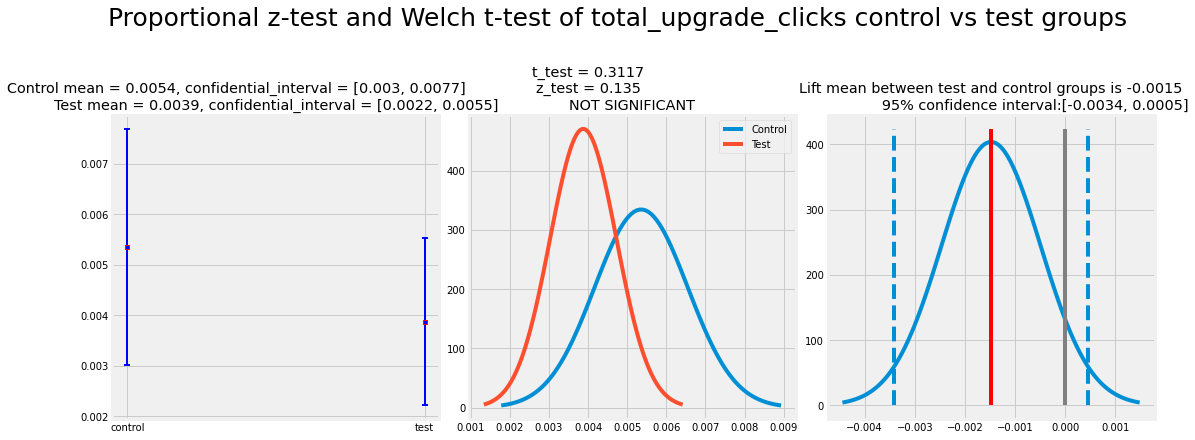

None

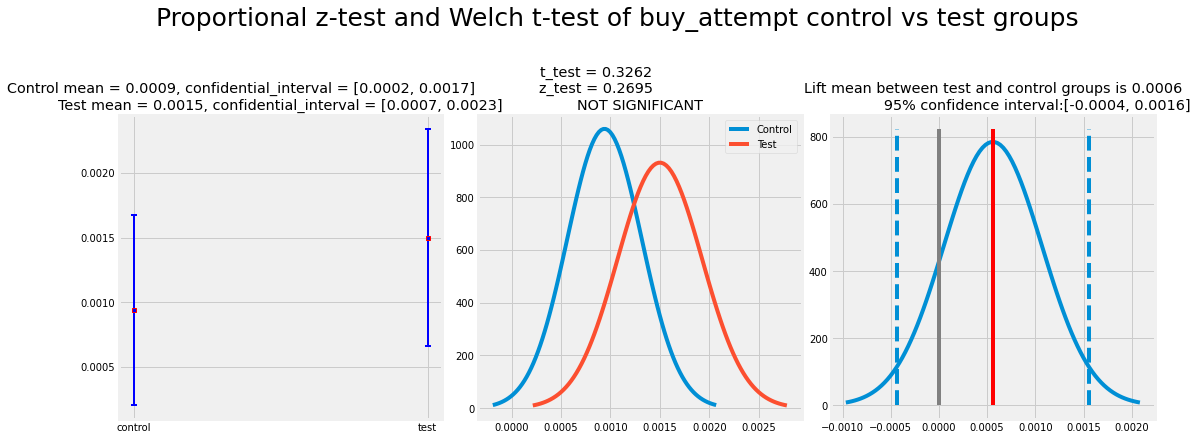

None

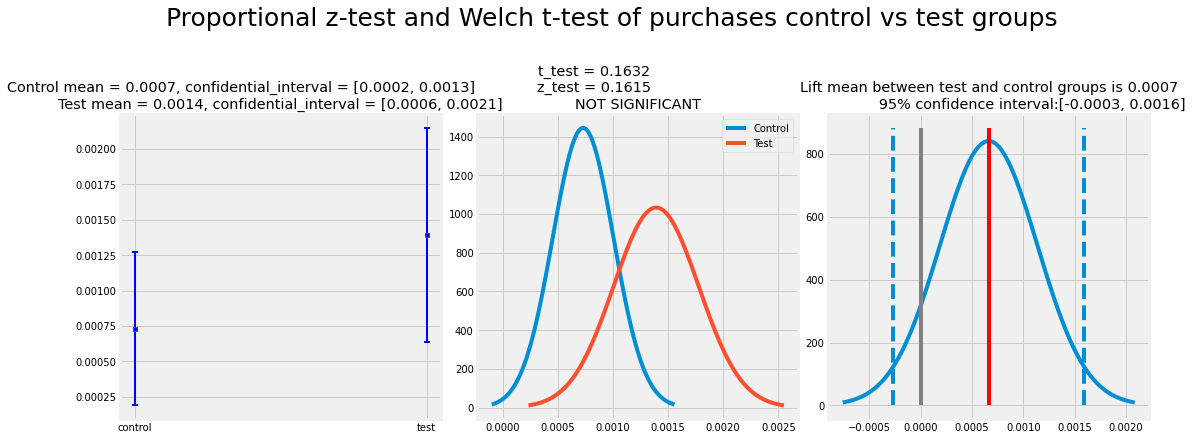

None

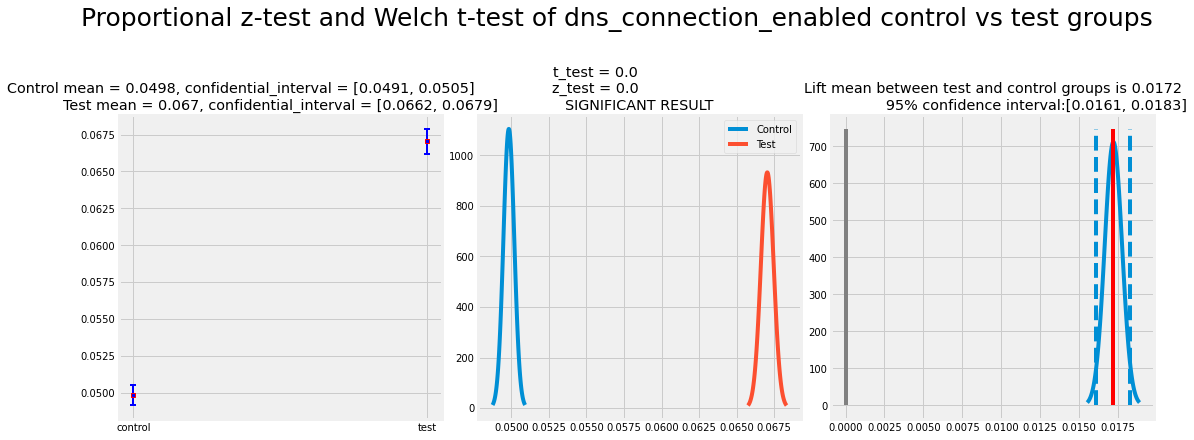

None

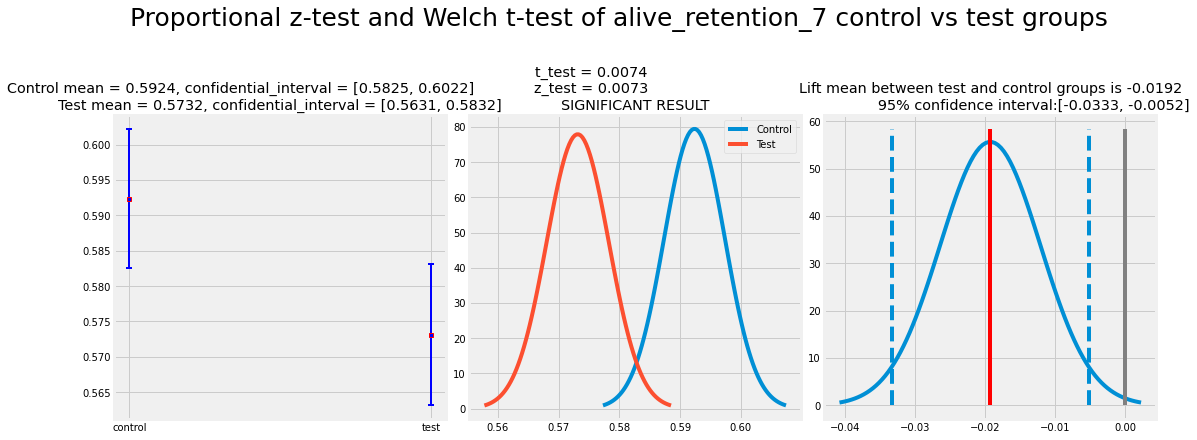

None

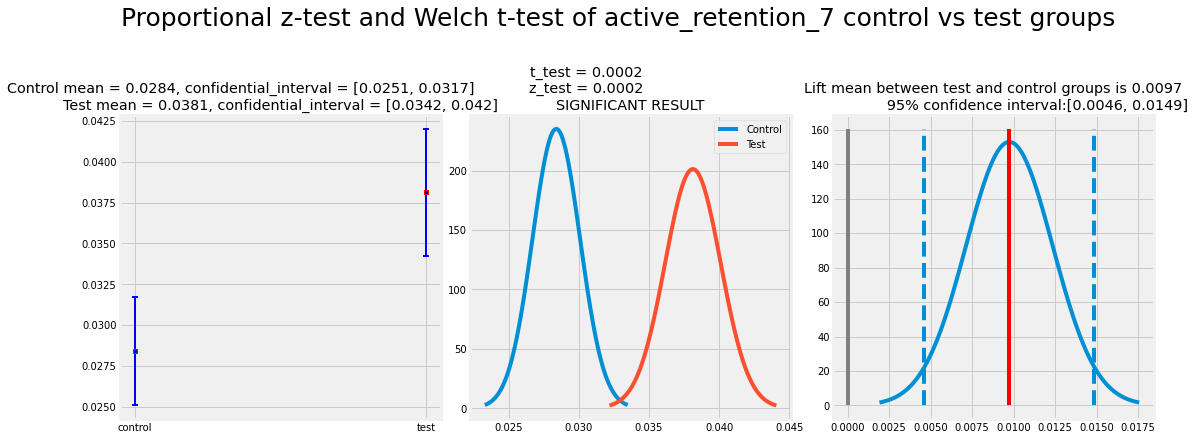

None

In [19]:
# Custom function to perform statistical analysis and draw the graphs
def stat_analysis(control, test, metric):
    
    '''
    The function takes as input two dataframes with control and test split and desired metric to compare,
    performs proportional z-test and Welch t-test on it, and build three graphs with confidence intervals, 
    distribution of the means and distribution of the means difference.
    
    Input: 
    control - DataFrame
    test - DataFrame
    metric - string
    
    Output:
    Matplotlib graphs with statistical vizualization
    
    '''
    # Filter by missing values
    control = control[control[metric].notnull()].copy()
    test = test[test[metric].notnull()].copy()
    # Calculate length of distribution
    cont_size = control.shape[0]
    test_size = test.shape[0]
    # Calculate sum of positive outcomes
    cont_sum = control[metric].sum()
    test_sum = test[metric].sum()
    # Calculate average of distribution
    cont_conv = control[metric].mean()
    test_conv = test[metric].mean()
    # Calculate standard deviation of distribution
    cont_conv_std = control[metric].std()
    test_conv_std = test[metric].std()
    # Calculate standard error of means distribution
    cont_conv_se = cont_conv_std / np.sqrt(cont_size)
    test_conv_se = test_conv_std / np.sqrt(test_size)
    # Calculate confidence interval of means distribution
    cont_conv_ci = cont_conv - 1.96 * cont_conv_se, cont_conv + 1.96 * cont_conv_se
    test_conv_ci = test_conv - 1.96 * test_conv_se, test_conv + 1.96 * test_conv_se
    
    # Set up subplot
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6), constrained_layout=True)
    # Set up graph with confidence intercals
    ax1.errorbar([control.version.unique().item(0),test.version.unique().item(0)], 
                 [cont_conv, test_conv], yerr=[1.96 * cont_conv_se, 1.96 * test_conv_se], capthick=2, elinewidth=2,
                 color="blue", capsize=3, marker="s", markersize=4, mec="red", fmt ='o')
    ax1.set_title("Control mean = {}, confidential_interval = {} \
                \nTest mean = {}, confidential_interval = {}".format(
              round(cont_conv,4),
              [round(n,4) for n in cont_conv_ci],
              round(test_conv,4),
              [round(n,4) for n in test_conv_ci]))
    
    # Perfrom z-test and t-test on the metric
    test_results = test[metric]
    control_results = control[metric]

    t_test = ttest_ind(test_results, control_results, alternative='two-sided', equal_var = False)
    z_test = proportions_ztest([cont_sum,test_sum], [cont_size,test_size], alternative='two-sided', prop_var = False)

#     statistic = t_test[0]
#     p_value = t_test[1]

    # Check for statistical significance
    if t_test[1]< 0.05 and z_test[1]< 0.05:
        conclusion = "SIGNIFICANT RESULT"
    else:
        conclusion = "NOT SIGNIFICANT"

    # Create the range of mean values 
    control_line = np.linspace(cont_conv - 3 * cont_conv_se, cont_conv + 3 * cont_conv_se, 100)
    test_line = np.linspace(test_conv - 3 * test_conv_se ,test_conv +  3 * test_conv_se, 100)

    # Plot the distribution of the means   
    ax2.plot(control_line, norm.pdf(control_line, cont_conv, cont_conv_se), label='Control')
    ax2.plot(test_line, norm.pdf(test_line, test_conv, test_conv_se), label='Test')
    ax2.legend()
    ax2.set_title("t_test = {} \
                  \nz_test = {} \
                  \n{}".format(round(t_test[1],4),round(z_test[1],4),conclusion))


    # Find the lift mean and standard error
    lift_mean = test_conv - cont_conv
    cont_var = (cont_conv * (1 - cont_conv)) / cont_size
    test_var = (test_conv * (1 - test_conv)) / test_size
    lift_se = (test_var + cont_var) ** 0.5
    

    # Generate the range of lift means
    lift_line = np.linspace(lift_mean - 3 * lift_se, lift_mean + 3 * lift_se, 100)

    # Plot the lift distribution
    ax3.plot(lift_line, norm.pdf(lift_line, lift_mean, lift_se))
    ymin, ymax = plt.ylim()

    # Add the annotation lines
    ax3.vlines(lift_mean, 0, ymax, color='r')
    ax3.vlines(0, 0, ymax, label='0', color='gray')
    ax3.vlines(lift_mean - 1.96 * lift_se, 0, ymax, linestyles="dashed")
    ax3.vlines(lift_mean + 1.96 * lift_se, 0, ymax, linestyles="dashed")
    ax3.set_title("Lift mean between test and control groups is {}\n\
                   95% confidence interval:{}" \
                  .format(round(lift_mean,4),
                         [round(lift_mean - 1.96 * lift_se,4),round(lift_mean + 1.96 * lift_se,4)]))
    
    plt.suptitle(f'Proportional z-test and Welch t-test of {metric} control vs test groups\n', fontsize=25)
    plt.show()
    
# display(stat_analysis(control, test, 'plan_picker_impressions'))
# display(stat_analysis(control, test, 'plan_picks'))
display(stat_analysis(control, test, 'total_upgrade_clicks'))   
display(stat_analysis(control, test, 'buy_attempt'))    
display(stat_analysis(control, test, 'purchases'))
display(stat_analysis(control2, test2, 'dns_connection_enabled'))
display(stat_analysis(control, test, 'alive_retention_7'))
display(stat_analysis(control, test, 'active_retention_7'))

### Graphs interpretation:

**The first graph** draw *means* of the test and control groups with *confidence intervals*, that could tell us about the range of possible *population mean* in 95% of cases if we repeat the experiment and get a new sample. 
**The rule of thumb here:** if the *confindence interval* one of the group overlaps *mean!!!* (not the *interval* by itself) of another group, it tells us that *population mean* can be the same for both samples, assuming null hypothesis can't be rejected - there is no ignificant difference between test and control.

**The second graph** displays (based on central limit theorem) distribution of the means for each (control and test) groups if we keep getting new samples and calculating new means. It's pretty visible how much those distribution overlaped or oppositely seperated from each other. The smaller the overlap, the better for the alternative hypothesis.

**The third graph** shows the distribution of the lift (or difference) between test or control groups with confidence intervals for this lift. **The rule of thumb here:** if zero lays in confidence interval of the lift it means that difference could absent and thus we can't reject null hypothesis.

### Inferences:
Based on the performed explorations and analysis we can judge that new feature (*notification banner*) positively impacts on the direct metric of user engagement with a product - the *protection* usage. Significantly amount of the users who started	turning on the ad block protection toggle was increased and in average it's higher then in control group (**6.7% +- 0.5%** vs **4.8% +- 0.7%**). Another significant difference was detected in **alive_retention** but not in the test group favor. Control sample were more successful here (**59% +- 1%** vs **57% +- 1%**). But out of all reteined **active** users are significantly more in the test group (expected since we mentioned above that increase in protection usage was detected) **38% +- 4%** vs **28% +- 3%**. Unfortunately even that we observed double rise in *purchases* in the test group, it coundn't be proved with significance by statistical methods: the distributions pretty much overlap each other and zero lays in the lift's confidence intervals, plus both tests gave us high p_value (around 0.16).


### Suggestions:
The new feature does its job well and encourages users to use ad protection. Significant positive impact on the sales hasn't been proved but we also didn't observed any significant drop downs in the rest of metric. Even 2% difference in alive retained users, was compensated by 10% increase in active out of all retained and that said with only 10 days observation (we have to monitor influence for a longer time after experiment to make final conclusions). Thus I would suggest to implement this feature and keep observing main metrics and effects plus keep planning new hypothesis and experiments in order to boost our sales and user engagement.